In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import time
import sys
import os

import seaborn as sns
import gensim
from datetime import datetime, date

import django
import platform

if platform.node() == "srv-mcc-apsis":
    sys.path.append('/home/muef/tmv/BasicBrowser/')
else:
    # local paths
    sys.path.append('/Documents/Data/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

# import from appended path
import parliament.models as pm
from parliament.tasks import do_search, run_tm
import cities.models as cmodels
import scoping.models as sm
from django.contrib.auth.models import User
from tmv_app.models import *
from utils.tm_mgmt import update_topic_scores
from utils.text import *
from django.db.models import Q, Count, Func, F, Sum, Value, Case, When, IntegerField

from parliament.utils import merge_utterance_paragraphs

### importing data

In [69]:
run_id = 2350

dts = DocTopic.objects.filter(run_id=run_id)

utterance_id = 1915489
#utterance_id = 3336271

dts = dts.filter(ut=utterance_id)

df = pd.DataFrame(dts.values('topic__title', 'score').order_by('score'))
#df

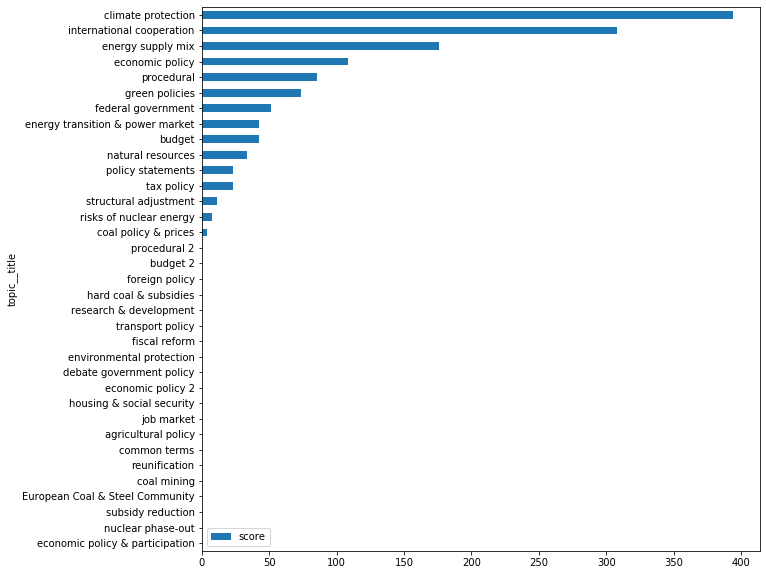

In [70]:
df.plot.barh(x='topic__title', y='score', figsize=(10,10))

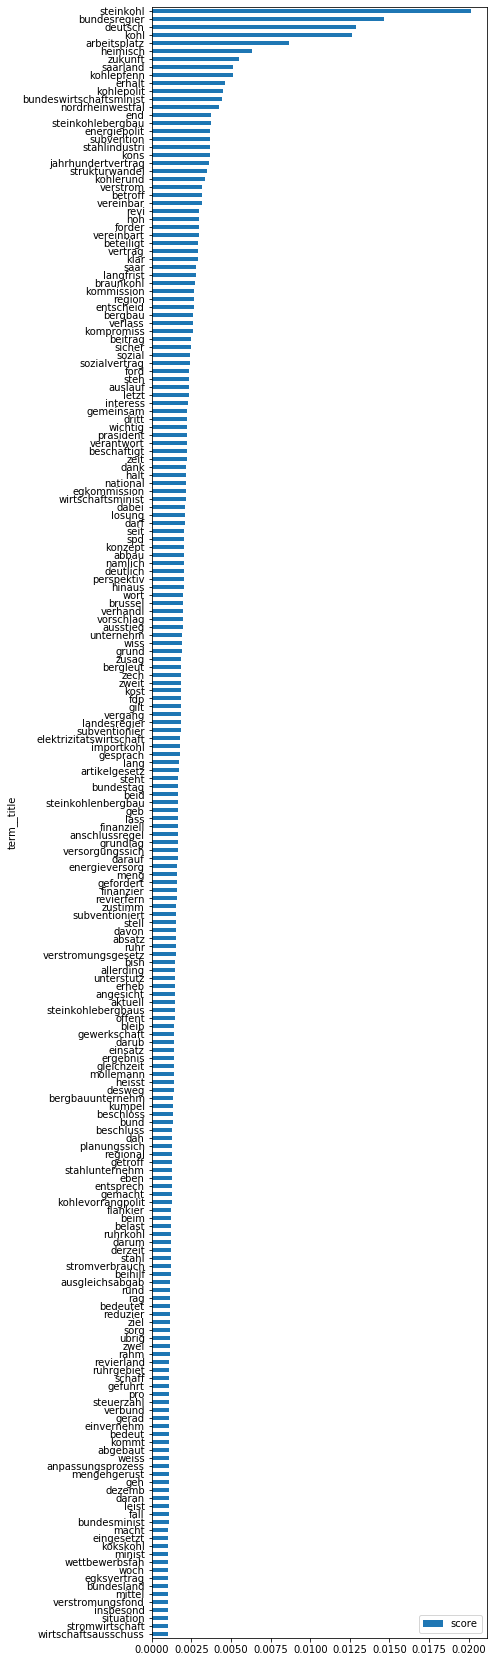

In [75]:
period = pm.Utterance.objects.get(id=utterance_id).document.parlperiod.n
period = 12

#topic_title = 'climate protection'
topic_title = 'energy supply mix'
topic_title = 'hard coal & subsidies'
topic = Topic.objects.get(title=topic_title, run_id=run_id)

tts = TopicTerm.objects.filter(topic=topic, PY=period)
tdts = TopicTimePeriodScores.objects.filter(
        topic=topic, period__n=period)
df_terms = pd.DataFrame(tts.values('term__title', 'score').order_by('score'))

df_terms.plot.barh(y='score', x='term__title', figsize=(6, 30))

In [61]:
speech_text = pm.Utterance.objects.get(id=utterance_id).paragraph_texts
speech_text

' Herr Präsident! Meine Damen und Herren! Herr Bundeswirtschaftsminister, in der letzten Debatte über die Energiepolitik, als Sie Ihr Artikelgesetz angekündigt haben, habe ich Sie gefragt, ob Sie im Ernst daran glauben, auf der Grundlage dieses Gesetzes Investitions- und Planungssicherheit schaffen zu können. Darauf sind Sie uns seinerzeit die Antwort schuldig geblieben. Auch das, was Sie heute ausgeführt haben, war keine Antwort. Es liegt doch auf der Hand – man hört es überall –: Weder die Elektrizitätswirtschaft noch der Bergbau, weder die Beschäftigten in der Kernenergie noch die Bergleute, ja, noch nicht einmal die Ihnen gewogene Presse glauben daran, daß Sie mit diesem Gesetzentwurf auch nur eines Ihrer energiepolitischen Ziele durchsetzen können. Ich habe Sie seinerzeit auch aufgefordert, diese taktischen Spielereien zu unterlassen und mit uns gemeinsam nach Ansatzpunkten zu suchen, bei denen wir einen Konsens in Einzelfragen finden können. Das haben Sie nicht gemacht. Sie haben

In [49]:
# from nltk.tokenize import sent_tokenize, word_tokenize
# words_in_each_sentence = word_tokenize(text)

In [62]:
for word in speech_text.split():
    for term in df_terms['term__title']:
        if re.match(term, word):
            print(word, term)

letzten letzt
schaffen schaff
geblieben. geb
liegt liegt
energiepolitischen energi
gemacht. gemacht
nutzlos nutz
lassen. lass
kohlepolitischen kohl
hohe hoh
folgen folg
darauf, darauf
genau genau
gerade gerad
wissen, wiss
gar gar
wirtschaftspolitische wirtschaft
sogar sogar
energiepolitischen energi
deutschen deutsch
eben, eben
schrittweise schritt
klare klar
eben eben
vorgelegt, vorgelegt
klar, klar
sogar sogar
eben eben
geblieben geb
senken, senk
setzt. setz
allein allein
verantwortlich, verantwort
wirtschaftliche wirtschaft
erreicht erreicht
erreicht erreich
konkret konkret
konkret konkret
gerade gerad
gehalten geh
preisgünstige preis
entscheidend entscheid
allerdings allerding
geblieben. geb
deutlich deutlich
gebraucht geb
entscheidende entscheid
geben geb
wirtschaftlich wirtschaft
gemacht. gemacht
macht macht
alternativen alt
vorgelegt. vorgelegt
erneuerbaren erneuerbar
liegt liegt
deutsche deutsch
fast fast
beim beim
kommt kommt
geboten, geb
klimaschädigenden klima
senken. senk
e